#                     FORECASTING OF GLOBAL CO2 EMMISSION
### By Ubong Camilus Ben

# Statement of Problem
As carbon dioxide emissions continue to contribute significantly to global warming and climate change, it becomes imperative to develop reliable methods for predicting future emissions levels. The challenge lies in accounting for various factors that influence CO2 emissions, such as population growth, economic activities, energy consumption patterns, and policy changes. Accurate forecasting of CO2 emissions is crucial for effective mitigation strategies, policy-making, and decision-making processes, enabling proactive measures to reduce emissions, address climate change, and foster sustainable development.

# Background
CO2 emissions, also known as carbon dioxide emissions, are one of the major contributors to global warming and climate change. CO2 is released into the atmosphere through various human activities, such as burning fossil fuels for energy, deforestation, and industrial processes. These emissions trap heat in the Earth's atmosphere, leading to an increase in average global temperatures. 

The effects of CO2 emissions are far-reaching and detrimental. One of the most significant impacts is the melting of glaciers and ice caps, leading to rising sea levels. This not only poses a threat to coastal communities but also results in habitat loss for various species. Additionally, CO2 emissions contribute to the phenomenon of ocean acidification, which is detrimental to both to the environment and biological lives living in it. 

Accurate CO2 predictions play a vital role in developing sustainable strategies and policies to address climate change effectively. Firstly, it allows us to assess and understand the potential impacts of future climate change. By predicting CO2 emissions trends, scientists and policymakers can evaluate the effectiveness of mitigation strategies and make informed decisions to reduce emissions and limit global warming. Secondly, accurate predictions can help us anticipate and adapt to the consequences of CO2 emissions, such as sea-level rise and changes in ecosystems. Additionally, CO2 predictions enable the identification of high-emission sectors, allowing for targeted efforts to reduce emissions and transition to cleaner alternatives.

In this project, we would use a time series dataset to forecasting 10 year future CO2 emission from power generation using natural gas


# The Dataset

For this project, we would employ a publicly available dataset sourced from the Energy Information Administration and Jason McNeill, containing monthly records of carbon dioxide emissions solely derived from electricity generation. This  dataset spans the period from January 1973 to July 2016, providing valuable insights into CO2 emissions from diverse energy resources utilized during this period. You can acess the dataset @ https://www.kaggle.com/txtrouble/carbon-emissions/data). 

# The tool box (necessary libraries)

In [1]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

from statsmodels.tsa.seasonal import seasonal_decompose




# Preliminary Exploratory data analysis

First, in the following cells, we will retrive the monthly CO2 emissions dataset and then try to understand it...

In [2]:
#Load dataset
df = pd.read_csv("MER_T12_06.csv")

#have a peak at the first five columns
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


From above, it seems that our dataset consists of 6 columns, including 2 columns of integer data type and 4 object type columns. It comprises a total of 5096 observations. 

By looking at the YYYYMM column, it could be noticed that the current method of retrieving the dataset only returns it as a dataframe, We need it as a time series dataset. 

Lets read our dataset as a time series...

In [4]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


Looks preety good...

In [5]:
#How does the tail end of the dataset look like?
df.tail()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
2016-03-01,TXEIEUS,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2016-04-01,TXEIEUS,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2016-05-01,TXEIEUS,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2016-06-01,TXEIEUS,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2016-07-01,TXEIEUS,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
# df.Unit.value_counts()      Million Metric Tons of Carbon Dioxide    5094
#df.Description.value_counts()  9values
#df.MSN.value_counts()  9value

Great. Now let us identify and drop the non datetimeindex rows
We can then use this to reference the time series dataset instead of the dataframe df. 

In [7]:
#However, first we  convert the index to datetime, coerce errors, and filter NaT
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
#But wait, Whats the data type of ts - to be double sure...
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

We can see that the emmision value column is an object which is not very right. We will convert the emision value into numeric value 

In [9]:
#ss = ts.copy(deep=True)
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


Now, lets check for nulls...

In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


So, I can see that about 4323 observations have emissions value.This looks plenty enough. I believe that it wont hurt if the empty rows emissions value are dropped. 

In [11]:
ts.dropna(inplace = True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4323 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4323 non-null   int64  
 3   Description   4323 non-null   object 
 4   Unit          4323 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 202.6+ KB


Great...

## 4.2	Time series dataset visualization

In [12]:
ts['Description'].unique()

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

From the above, it mostly seems that our dataset has 8 energy sources of CO2 emission. It would be structurally neat if we could group the CO2 Emission dataset based on the type of energy source. This would make analysis and handling easier...

In [13]:
Energy_sources = ts.groupby('Description')

Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


So much data. Hard to interprete.
Lets see some CO2 emmision visuals.

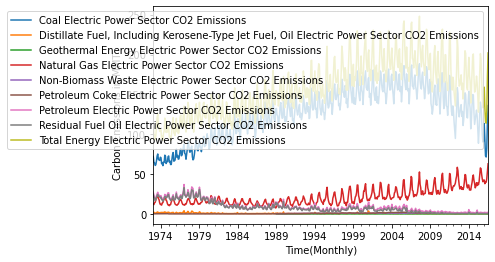

In [14]:
# This cell visualizes the dependency of the emission in the power generation with time. 
Energy_sources['Value'].plot()
plt.xlabel('Time(Monthly)')
plt.ylabel('Carbon Emissions in MMT')
plt.legend()
plt.show()

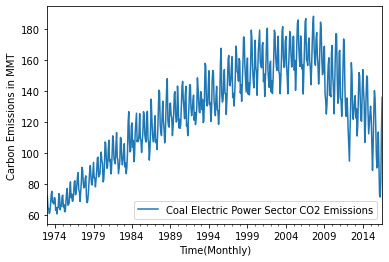

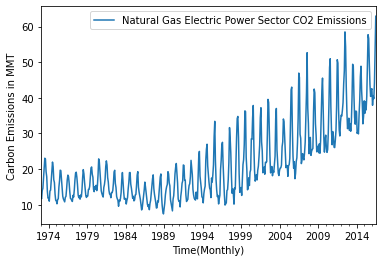

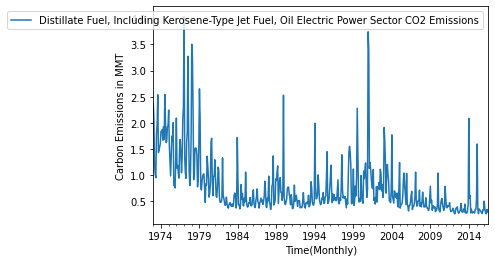

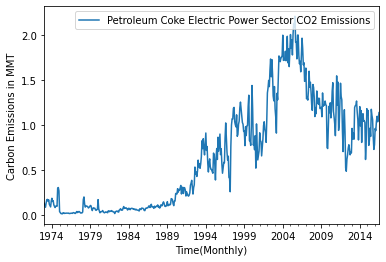

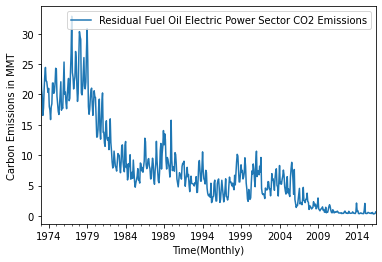

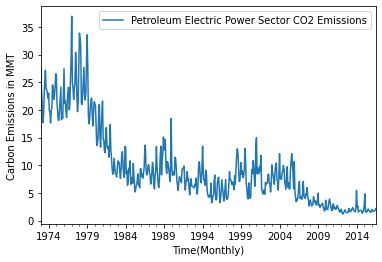

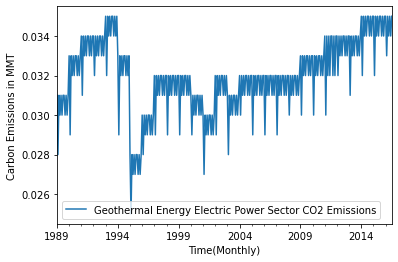

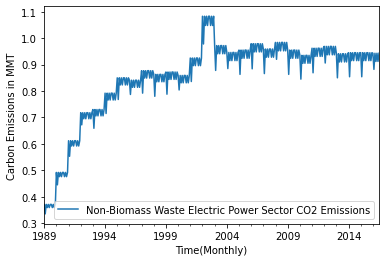

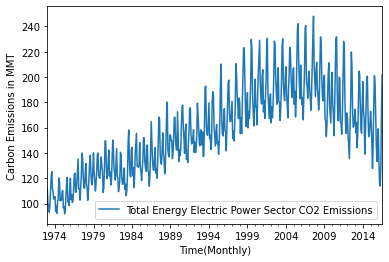

In [15]:
col=ts['Description'].unique()
for c in col:
    s=ts[ts['Description']==c]
    s['Value'].plot()
    plt.xlabel('Time(Monthly)')
    plt.ylabel('Carbon Emissions in MMT')
    plt.legend([c])
    plt.show()



   ## Comparative analysis of the CO2 emmisions based on energy source

In [16]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [17]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

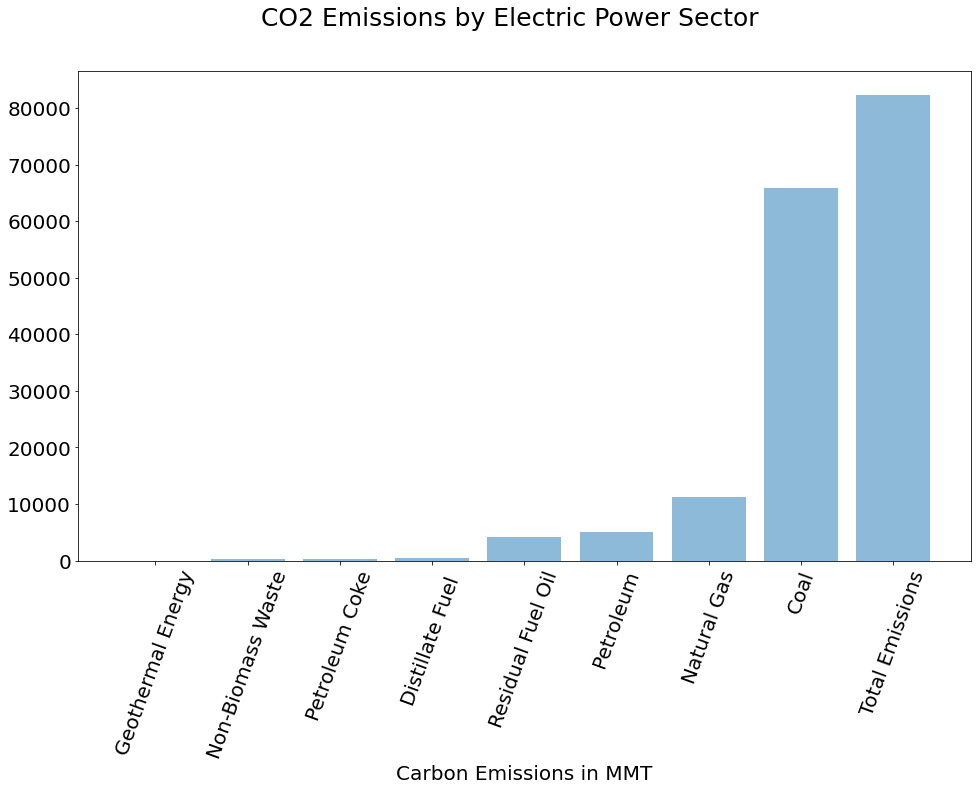

In [18]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

*The chart shows that coal contributes highest to carbon emmission. Of course, this is expected. Nevertheless, this is closely followed by coal.*

# Time Series Modelling and Forecasting

For developing the time series model, we would emoploy natural gas CO2 emission from the electirical power generetion. First, we slice ts. 

In [19]:
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [20]:
#Now, i will use Pandas Grouper to obtain  Monthly total emissions (mte) based on each emmision
Emissions = ts.iloc[:,1:]   #

Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)

#lets work with natural gas
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] 
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

 # Stationarity test

Since we are dealing with time series data. It will be important to conduct stationarity test. What do we mean by this?

#### culled from tutorialpoint.com
The practice of utilizing statistical methods to comprehend the data over time and make predictions about it is known as time series analysis. The ability to spot patterns, trends and linkages in the data that can be utilized to forecast future outcomes makes time series analysis crucial.

When a time series is said to be stationary, it means that its statistical characteristics have remained stable over time. If the data's mean, variance, and autocorrelation structure do not vary over time, a time series is regarded as stationary. The statistical behavior of a stationary time series will be consistent across time, to put it another way.

The fact that many time series analysis techniques presuppose stationarity is one of the key reasons why time series must be stable before analysis. For instance, the widely used ARIMA (Auto-Regressive Integrated Moving Average) model for forecasting makes the assumption that the data is stationary. The model will not be able to faithfully reflect the underlying patterns in the data if it is non-stationary, and the findings will be erroneous.

The fact that non-stationarity might result in incorrect or misleading results is another justification for the necessity of time series being stationary before analysis. As an illustration, a non-stationary time series could give the impression that there is a high connection between two variables, but in reality, the correlation is only there because of a trend or a seasonal element in the data.

In this project, we would test for stationarity graphically and using the Dickey-Fuller technique.

## Graphical test for stationality

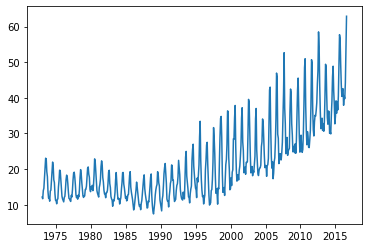

In [21]:
plt.plot(mte)

Based on the figures, it is clear that the CO2 emission dataset exhibits a seasonal variation trend. As a result, we can deduce that the dataset is non-stationary.

## Testing  stationary using the Dickey-Fuller method

The null hypothesis for the Dickey-Fuller test is that the time series is non-stationary. The test results compare a Test Statistic and Critical Values (cutoff value) at different confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we  reject the null hypothesis and say that the series is stationary. This technique will be handled by the TestStationaryAdfuller( ) method given below.


In [22]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

### Testing the monthly emissions time series

In [23]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The average emissions and the standard deviation (represented by the black line) exhibit noticeable changes over time, indicating the presence of a trend in the series. Therefore, the series is not stationary. Additionally, when considering the Test Statistic at confidence levels of 90%, 95%, and 99%, it surpasses the critical values. Thus, there is insufficient evidence to reject the null hypothesis, further supporting the conclusion that the series is nonstationary.

## Transformation of our time series to stationary format

Now that we understand that our data is not stationary, we would go on to transform to stationary. We will use the polimonial fitting model for this purpose. 


In [24]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks()
    plt.yticks()
    
    plt.xlabel('Time in Years')
    plt.ylabel('Total Emissions')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= True)

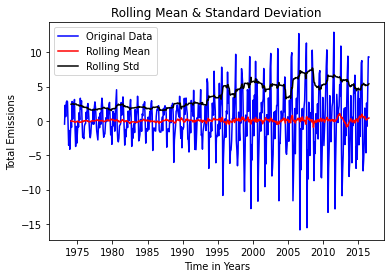

In [25]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [26]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Considering evidence, we will use the ***seasonal difference*** to remove the seasonality of the data and see how that impacts stationarity of the data.

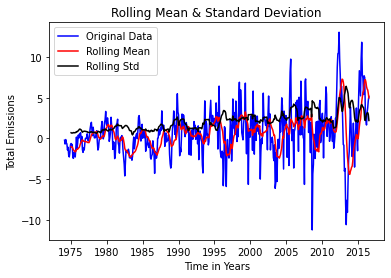

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [27]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference of the seasonal difference.

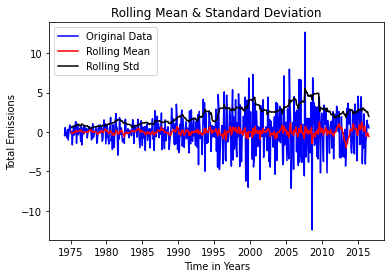

In [28]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [29]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Now, if we look the Test Statistic and the p-value, taking the seasonal first difference has made our the time series dataset stationary. This differencing procedure could be repeated for the log values, but it didn’t make the dataset any more stationary.

#### Now let us eliminate trend and seasonality using the decomposing technique

In this technique, it statrating by modeling both trend and seasonality and removing them from the model.

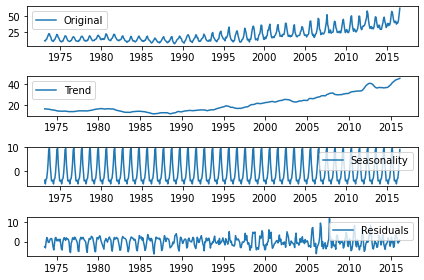

In [30]:
decomposition = seasonal_decompose(mte)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals.

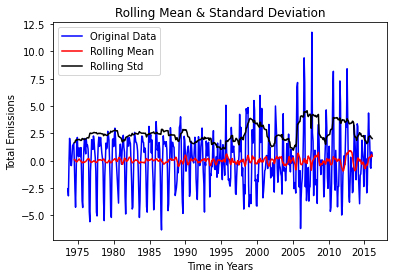

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [31]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

# Building Seasonal ARIMA Model

We will now proceed to build our ARIMA model but first, lets find optimal parameters and build SARIMA model

When looking to fit time series dataset with seasonal ARIMA model, our first goal is to find the values of SARIMA(p,d,q)( that optimize our metric of interest. We would go about this by looking at the autocorrelation and partial autocorrelation graphs and determining the tuning parameters from them. 

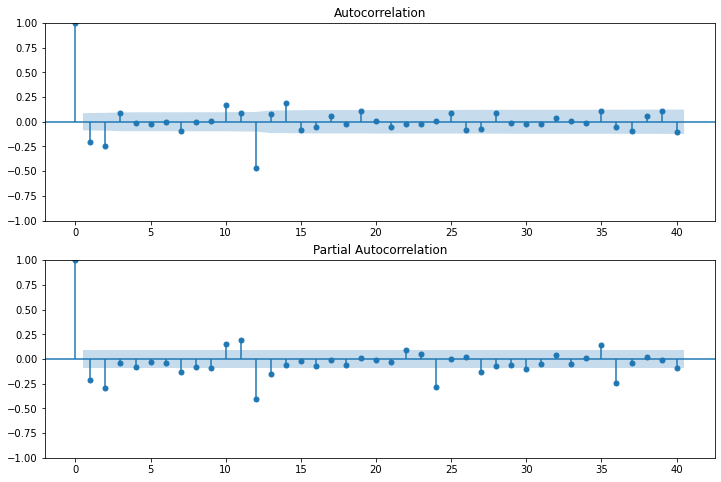

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

To find the optimal parameters for ARIMA models using the graphical method is not trivial and it is time consuming. We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. The grid search iteratively explore different combinations of the parameters. For each combination of parameters, we will fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. Let's begin by generating the various combination of parameters that we wish to assess:

In [33]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [34]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]



When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. The lowest AIC  refore, we are interested in finding the model that yields the lowest AIC value.

The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

Notes on AIC score:
AIC will choose the best model from a set(The “best” model will be the one that neither under-fits nor over-fits.),then  consider running a hypothesis test to figure out the relationship between the variables in your model and the outcome of interest.

In [35]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


In [36]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [37]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4804.065995091218
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4135.625648186408
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2572.1947577443707
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2504.2095028358435
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2544.146426616797
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2465.147262997108
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2505.840238070918
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4157.561225515803
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3572.1059021689143
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2334.7247254084773
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2245.507386420678
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2329.044601405365
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2218.680097744728
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2262.0627979899327
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2247.532772188916
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2932.1335743055997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.0128108187673
ARI

SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 2003.553. Therefore, we will consider this to be optimal option out of all the parameter combinations.W e have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

In [38]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Sat, 22 Jul 2023   AIC                           2003.553
Time:                                                     16:32:05   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

<AxesSubplot:xlabel='YYYYMM'>

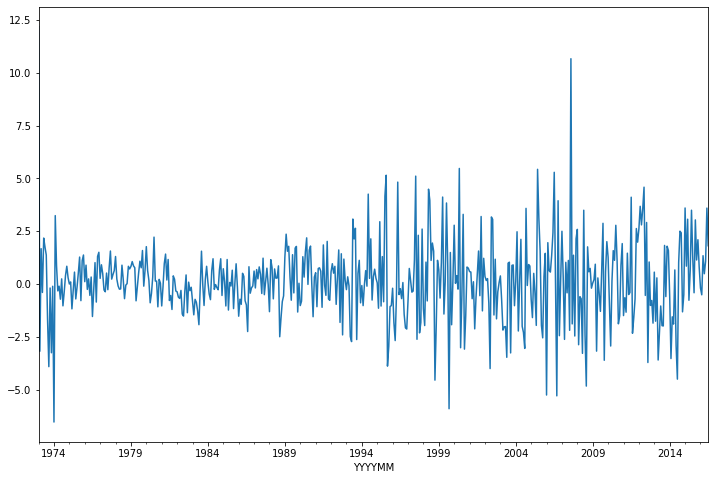

In [39]:
results.resid.plot(figsize=(12,8))

In [40]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528425
25%       -0.791260
50%        0.126975
75%        1.040651
max       12.175000
dtype: float64


The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

<AxesSubplot:ylabel='Density'>

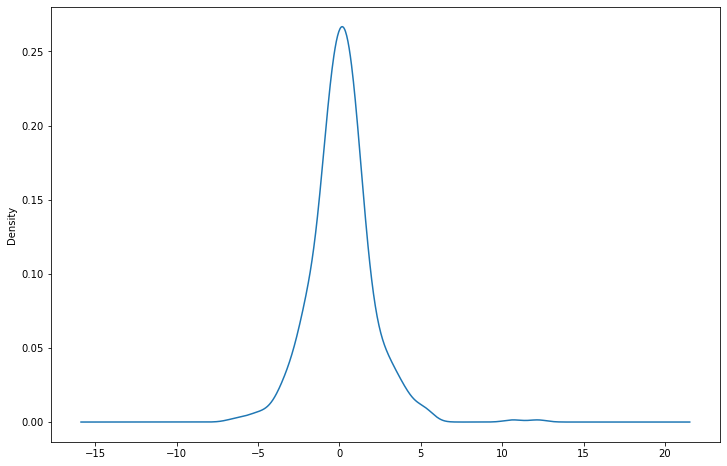

In [41]:
results.resid.plot(figsize=(12,8),kind='kde')

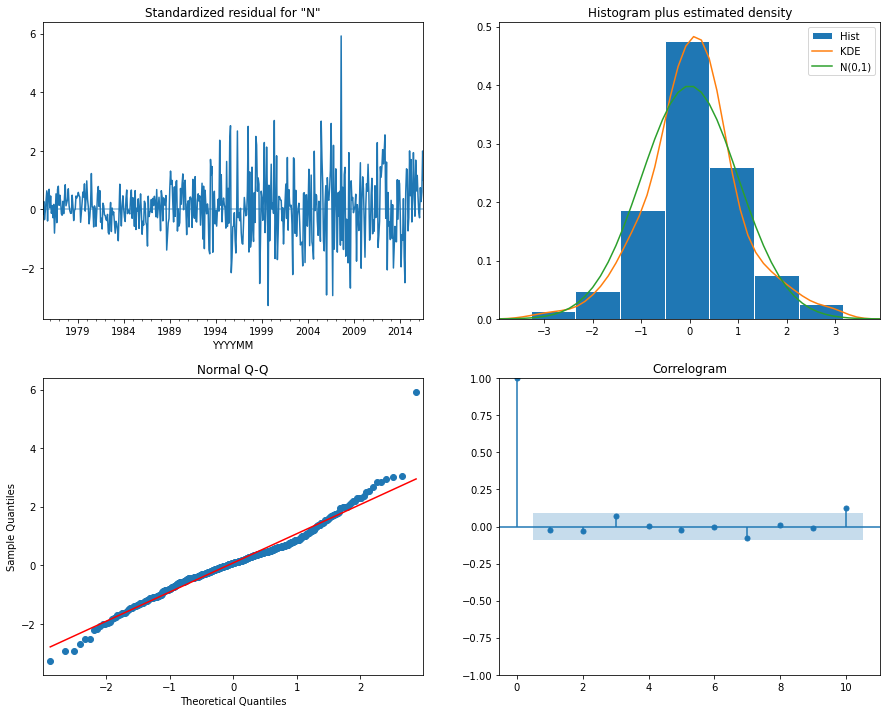

In [42]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

**Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean.**

The model diagnostic suggests that the model residual is normally distributed based on the following:

- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution.  
- In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed.


# 7) Validating prediction

We have successfully developed a model for our time series that enables us to generate forecasts. To assess the forecast's accuracy, we begin by comparing the predicted values with the actual values of the time series. T

In [43]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2013-01-31,30.203834,37.257324
2013-02-28,29.088380,36.141870
2013-03-31,28.958984,36.012474
2013-04-30,30.708073,37.761563
2013-05-31,32.104079,39.157569


We would now plot the real agaist the forecasted CO2 emission time series to assess how well performed.

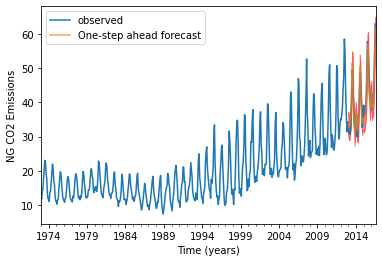

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: nan


In [44]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

#calculate MSE and RMSE

mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

**Our model actually looks good. Infact, it looks excellent alligning consistently with the true values.**


#### -- Dynamic Forecast --

In [45]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

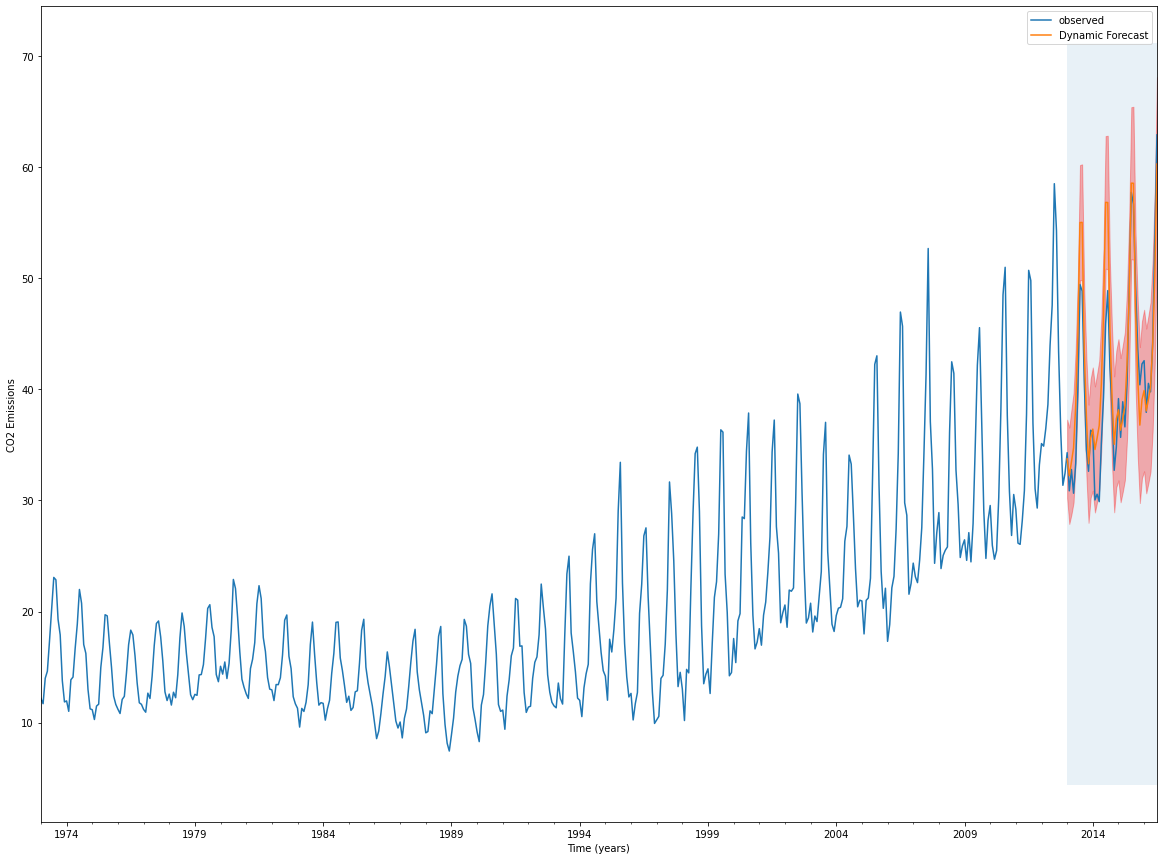

In [46]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

From, plotting the observed and forecasted values of the time series, we see that the overall forecasts are accurate even when we use the dynamic forecast. All forecasted values (red line) match closely to the orginal observed (blue line) data, and are well within the confidence intervals of our forecast.

In [47]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


# Forecasting of CO2 emmisions

In [48]:
# Get forecast of 15 years or 180 months into the future
forecast = results.get_forecast(steps= 180)

# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062559,65.116049
2016-09-30,47.316614,55.987495
2016-10-31,40.736071,50.163094
2016-11-30,36.175922,46.010287
2016-12-31,38.095110,48.172698


We can use the output of this code to plot the time series and forecasts of its future values.

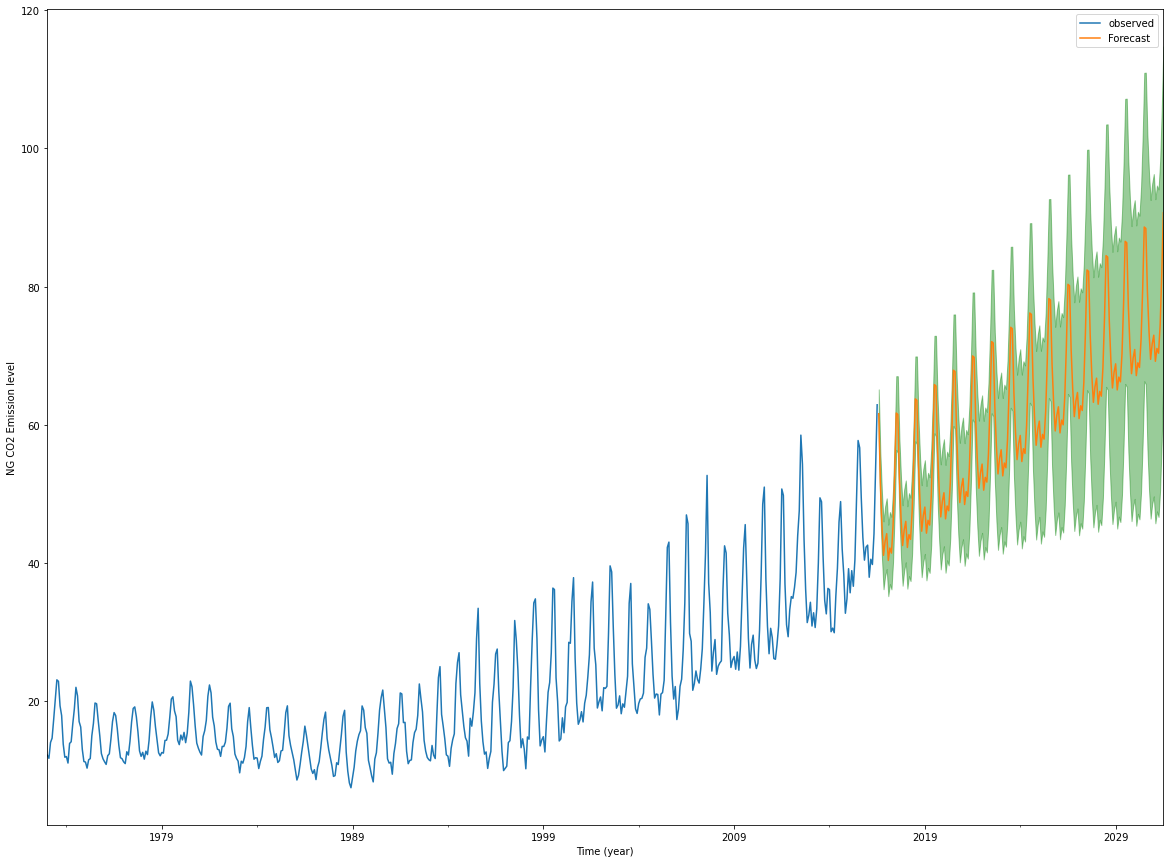

In [49]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

The forecast shows that the CO2 emission from natural gas power generation is expected to continue increasing.
Of course, both forecast and associated confidence interval  generated can be used to further explore and understand the time series.

## Conclusion

In this project, we employed the ARIMA and SARIMA model for the prediction and forecasting of CO2 emmision. The predictions show that if precautionary measures are not taken, the emmission is expected to keep rising with unhealthy consequences for the global environment. 